### Background and Context



* Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

#### Objective

* Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Data Description

* The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 


                    0=No ( Customer did not leave the bank ) 

                    1=Yes ( Customer left the bank )



### Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Data Pre-processing</a>


- <a href = #link4>Split the data</a> 


- <a href = #link5>Model building : Build Neural Network</a>


- <a href = #link6>Model Performance Evaluation</a>


- <a href = #link7>Business Recommendations/Actionable Insights</a>

## <a id = "link1"></a> Overview of the dataset 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
sns.set_style("whitegrid")
np.random.seed(697)

In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'bank.csv'

In [ ]:
#reading dataset
data = pd.read_csv(dataset_file)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape


(10000, 14)

* The dataset has 10000 rows and 14 columns

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There is no null values
* There is no duplicated data
* There is many zeros in the data that we could look at and decide if we need to fix them

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are a few datatypes that need to be changed from object to category 

In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
cat_cols = [
  'RowNumber',          
  'CustomerId',         
  'Surname' ,            
  'CreditScore' ,         
  'Geography',            
  'Gender' ,               
  'Age' ,                  
  'Tenure' ,               
  'Balance',             
  'NumOfProducts',        
  'HasCrCard' ,            
  'IsActiveMember',        
  'EstimatedSalary',     
  'Exited',
]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 30)

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
------------------------------
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
------------------------------
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Afanasyev     1
Templeman     1
Kalinin       1
Torode        1
Pettry        1
Name: Surname, Length: 2932, dtype: int64
------------------------------
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    454

* RowNumber,CustomerID,and Surname can be drop since they dont add value to our analysis.
* France has 5014, Germany has 2509, Spain has 2477 customers
* a good balance in gender
* The lowest tenure 0 and 10
* There are alot of customers with 0 balances
* Product 3 and 4 have very low number that need to be addressed
* 7055 customers have a card
* Good balance in active and non-active members
* As expected there are only 2 forms :
 0=No ( Customer did not leave the bank ) 
 1=Yes ( Customer left the bank )

In [ ]:
#checking the percentage of each Exited in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* This shows a imbalance between the two forms of exited. There are 79.63% of Customers that did not leave the bank (0) instances and only 20.37% of the Customers left the bank (1) instances. This means we may need more data for the customers that left the bank to see what was the cause so that our neurtal network can better perdict who will leave in the future.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* The min for cedit score is 350 and the high is 850
* the lowest age is 18, the midean is 32 and the oldest 92
* the lost tenure is 0 and the longest is ten years
* The highest balance is 250898
* there are 4 products

*** <a id = "link2"></a> EDA*** 

### ***Univariate analysis***

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

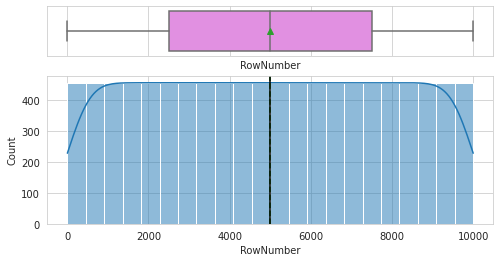

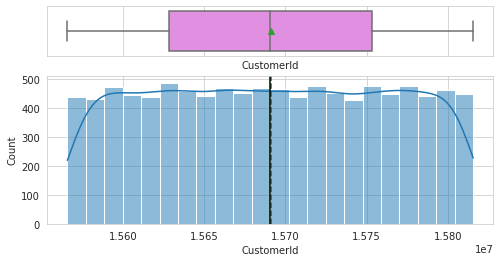

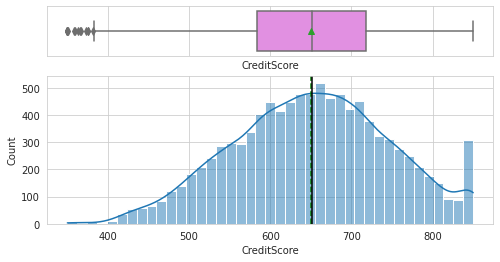

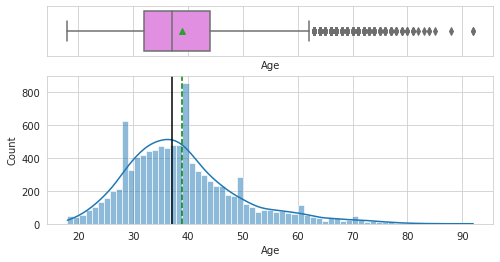

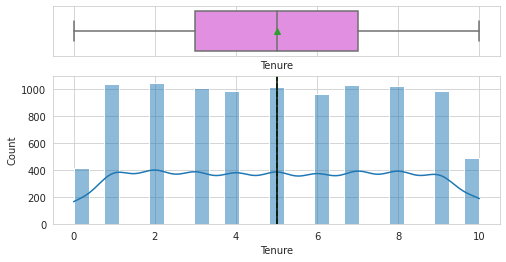

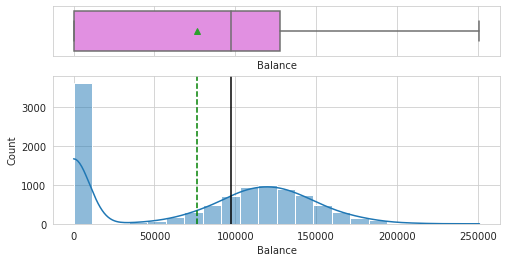

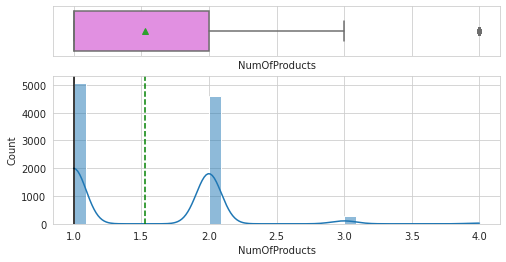

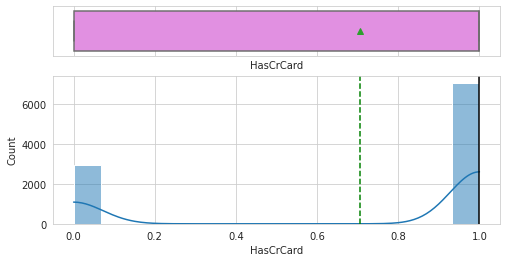

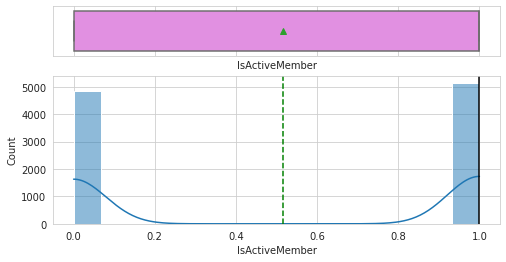

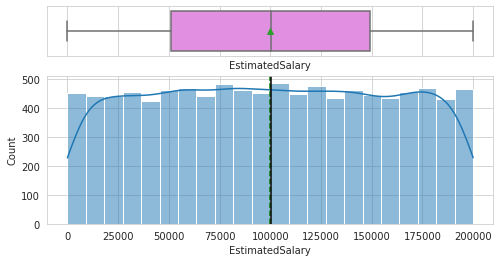

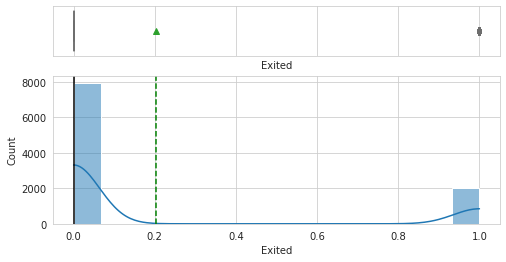

In [ ]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

* Credit score: the distribution is  lightly skewed to the right and also have a few outliers that we can take care of in data processing

* Age: the distribution is  skewed to the left and also have a alot outliers that we can take care of in data processing

* Balance and number of porducts distribution is highly skewed to the left 
* Exited is skewed to the right with one outlier

In [ ]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (15, 10)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

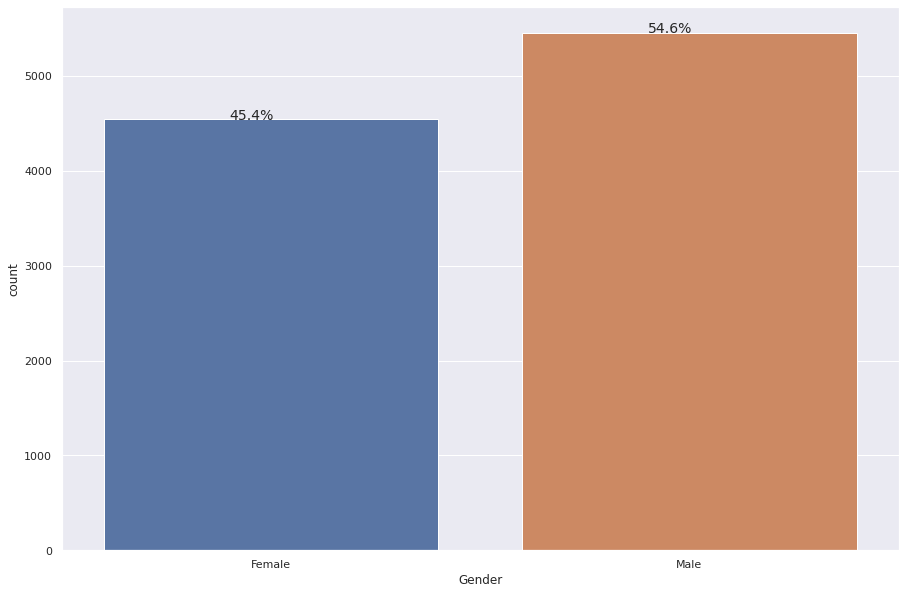

In [ ]:
perc_on_bar(data['Gender'])

* Gender has a good balance with alittle bit more of male customers

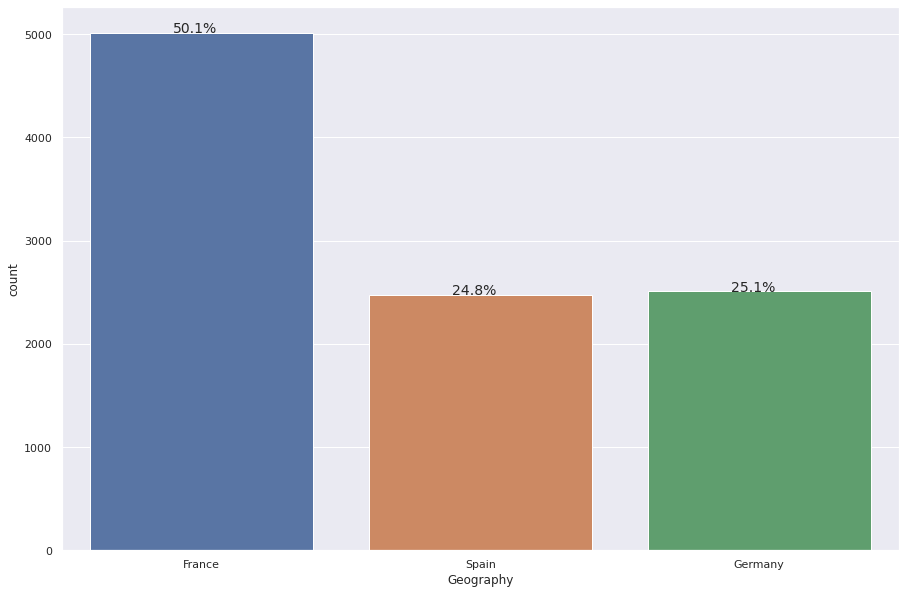

In [ ]:
perc_on_bar(data["Geography"])

* France has 50 percent of the customers

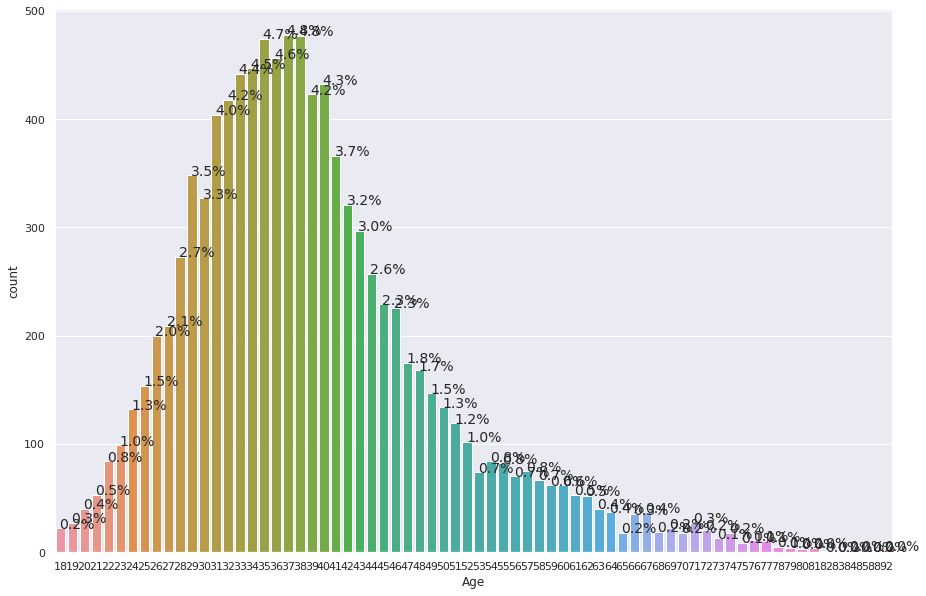

In [ ]:
perc_on_bar(data['Age'])

* Most of the customers are between 35 and 40 years old

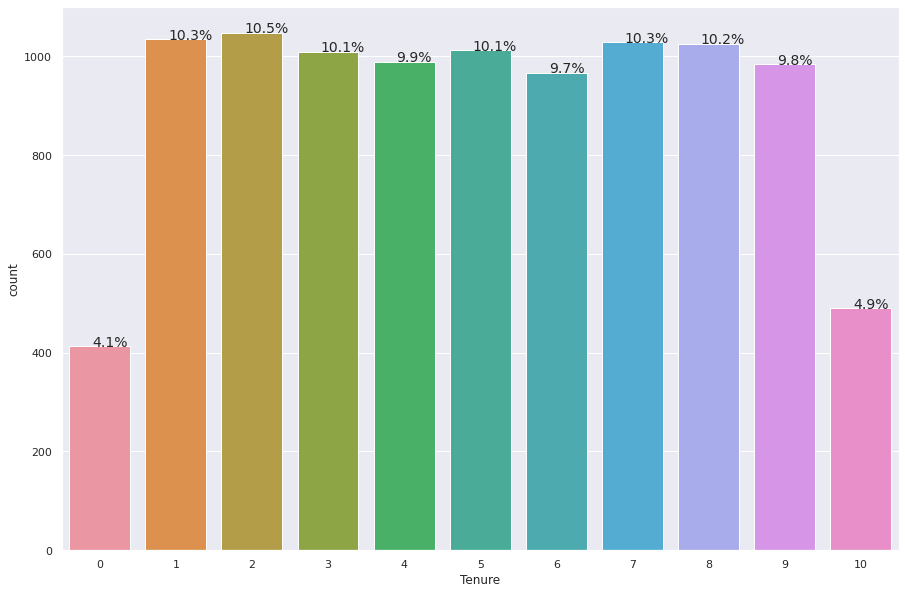

In [ ]:
perc_on_bar(data['Tenure'])

* O tenure and 10 have the lowest percent

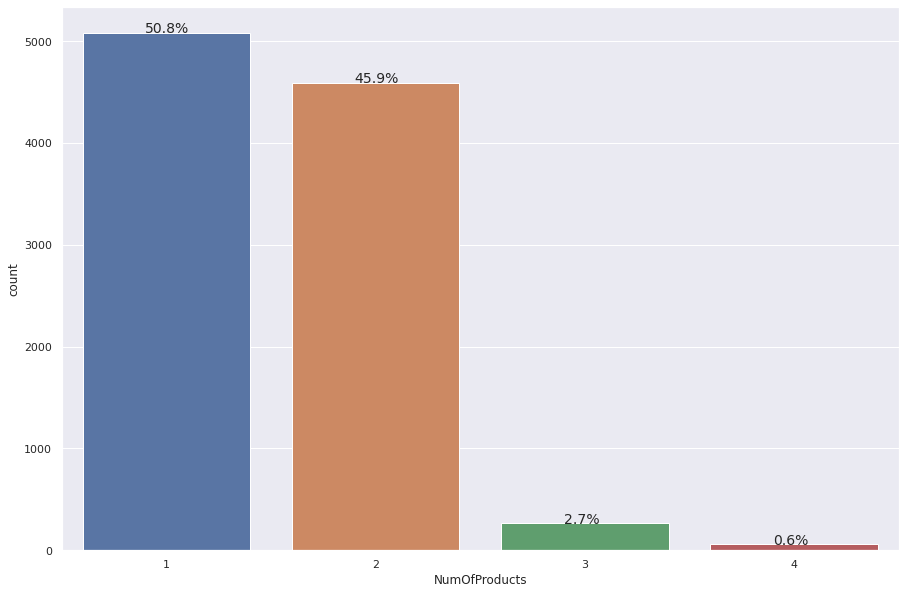

In [ ]:
perc_on_bar(data["NumOfProducts"])

* Products 1 and 2 account for 97 percent of the data

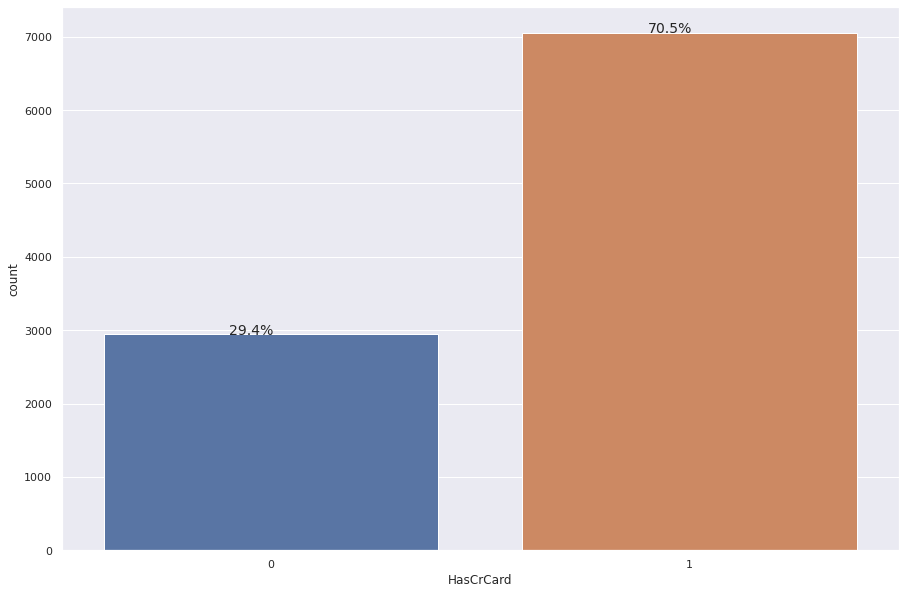

In [ ]:
perc_on_bar(data['HasCrCard'])



* About of 70.5 percent have a card

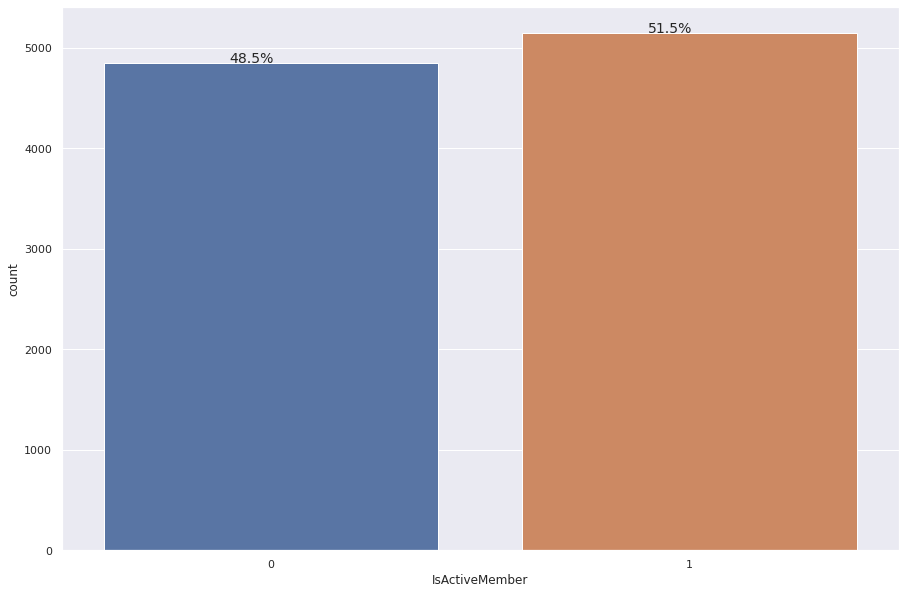

In [ ]:
perc_on_bar(data['IsActiveMember'])



* Good balance between active and non-avitve members

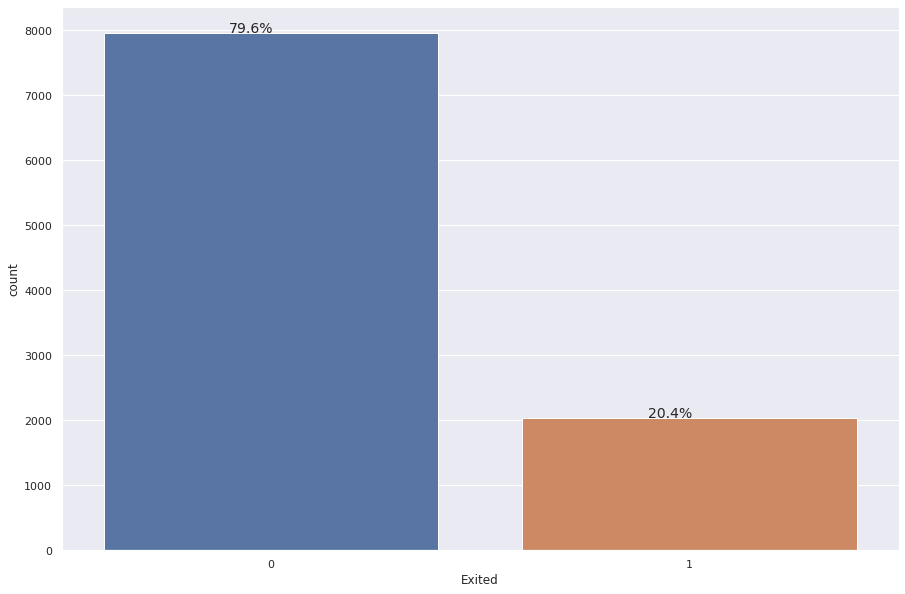

In [ ]:
perc_on_bar(data['Exited'])



* This shows a imbalance between the two forms of exited. There are 79.63% of Customers that did not leave the bank (0) instances and only 20.37% of the Customers left the bank (1) instances. This means we may need more data for the customers that left the bank to see what was the cause so that our neurtal network can better perdict who will leave in the future.

### ***Bivariate analysis***



In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


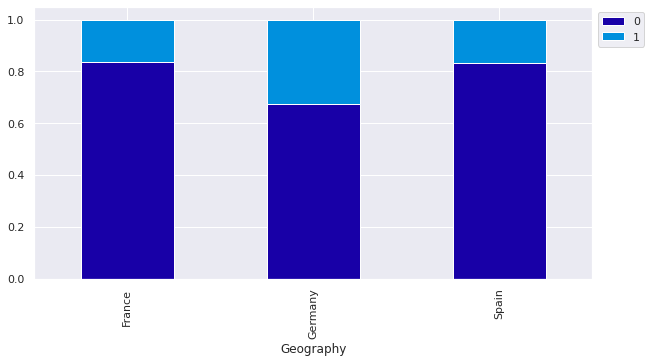

In [ ]:
stacked_plot(data['Geography'])

* Germany has the most exited customers at 814

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


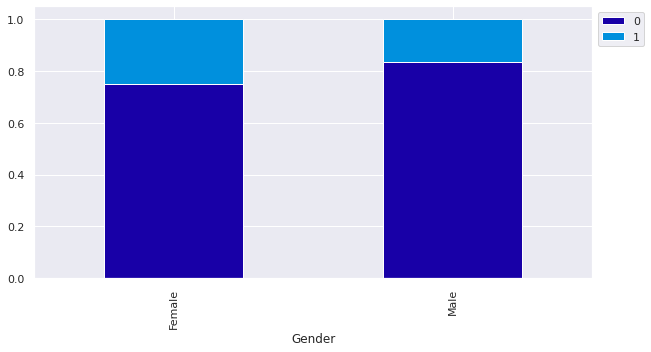

In [ ]:
stacked_plot(data['Gender'])

* More female have exited then males

Exited     0     1    All
Age                      
18        20     2     22
19        26     1     27
20        38     2     40
21        50     3     53
22        72    12     84
..       ...   ...    ...
84         1     1      2
85         1     0      1
88         1     0      1
92         2     0      2
All     7963  2037  10000

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


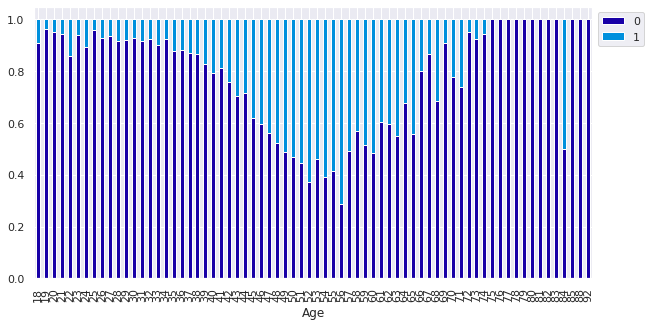

In [ ]:
stacked_plot(data['Age'])

* The age 56 and 84 has the most exited customers


Exited     0     1    All
Tenure                   
0        318    95    413
1        803   232   1035
2        847   201   1048
3        796   213   1009
4        786   203    989
5        803   209   1012
6        771   196    967
7        851   177   1028
8        828   197   1025
9        771   213    984
10       389   101    490
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


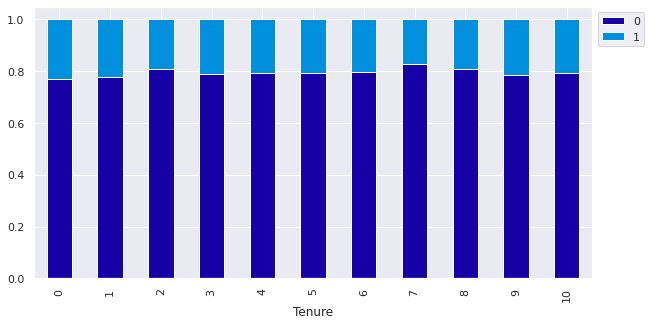

In [ ]:
stacked_plot(data['Tenure'])

Good balance though all the years with 0 having the least because they are new 

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


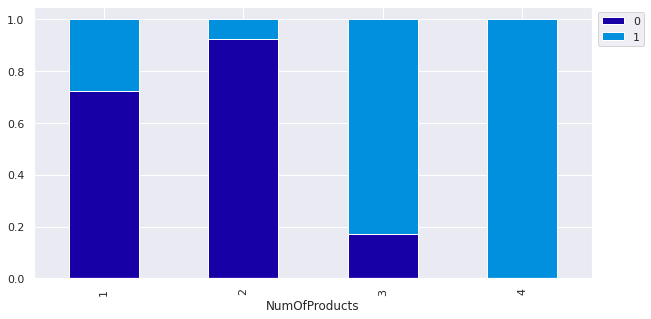

In [ ]:
stacked_plot(data['NumOfProducts'])

Product 1 has the most exited but product 4 has o that stayed and 60 that exited. Which could mean that thier is a problem with product 4 and more analysis needs to be done 

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


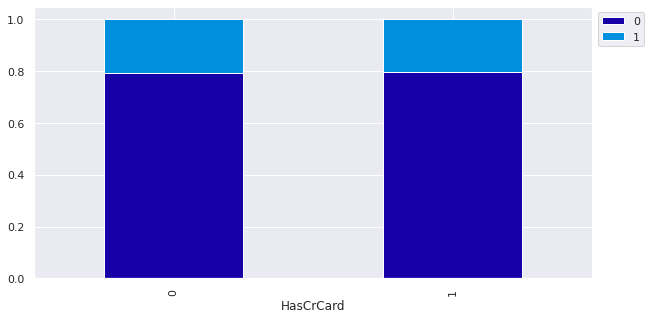

In [ ]:
stacked_plot(data['HasCrCard'])

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


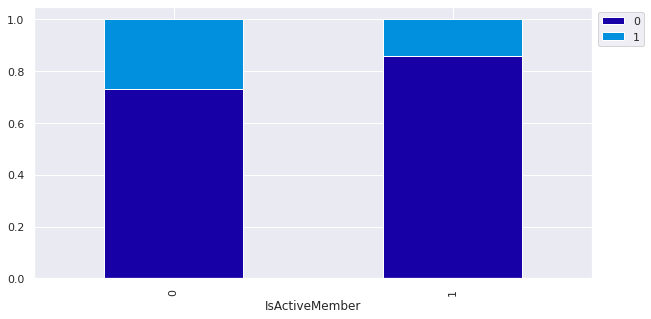

In [ ]:
stacked_plot(data['IsActiveMember'])

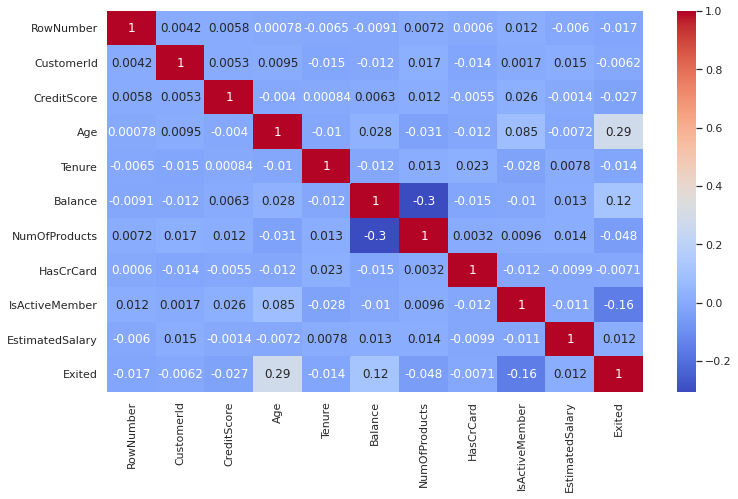

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

No apparent relationship present between varibles

In [ ]:
import seaborn as sns

sns.pairplot(data=data)

Output hidden; open in https://colab.research.google.com to view.

* There are overlaps no clear distinction in the distribution of variables for customers 
* Let's explore this further with the help of other plots.

## <a id = "link3"></a> Data Pre-processing 

In [ ]:
data.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace = True) 

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [ ]:
data.head(100)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
95,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


In [ ]:
categorical_cols = ['Geography', 'Gender'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
data.head(100)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
95,515,2,1,35,10,176273.95,1,0,1,121277.78,0
96,773,2,1,41,9,102827.44,1,0,1,64595.25,0
97,814,1,1,29,8,97086.40,2,1,1,197276.13,0
98,710,2,1,22,8,0.00,2,0,0,99645.04,0


## <a id = "link4"></a> Split the data 

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=data.iloc[:,0:11]

# Specify the target labels and flatten array
y= data.Exited


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


## <a id = "link5"></a> Model building : Build Neural Network 

## First model

In [ ]:
   model = Sequential()

In [ ]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=20,epochs=50,validation_split=0.2)

Epoch 1/50
280/280 [==============================] - 1s 2ms/step - loss: 2.1480e-06 - accuracy: 0.2080 - val_loss: 5.9064e-06 - val_accuracy: 0.2057
Epoch 2/50
280/280 [==============================] - 0s 2ms/step - loss: 1.7538e-06 - accuracy: 0.2080 - val_loss: 4.8999e-06 - val_accuracy: 0.2057
Epoch 3/50
280/280 [==============================] - 0s 2ms/step - loss: 1.4414e-06 - accuracy: 0.2080 - val_loss: 4.1624e-06 - val_accuracy: 0.2057
Epoch 4/50
280/280 [==============================] - 0s 2ms/step - loss: 1.1893e-06 - accuracy: 0.2080 - val_loss: 3.5648e-06 - val_accuracy: 0.2057
Epoch 5/50
280/280 [==============================] - 1s 2ms/step - loss: 9.8291e-07 - accuracy: 0.2080 - val_loss: 3.0182e-06 - val_accuracy: 0.2057
Epoch 6/50
280/280 [==============================] - 0s 2ms/step - loss: 8.1518e-07 - accuracy: 0.2080 - val_loss: 2.5837e-06 - val_accuracy: 0.2057
Epoch 7/50
280/280 [==============================] - 1s 2ms/step - loss: 6.7863e-07 - accuracy: 0.2

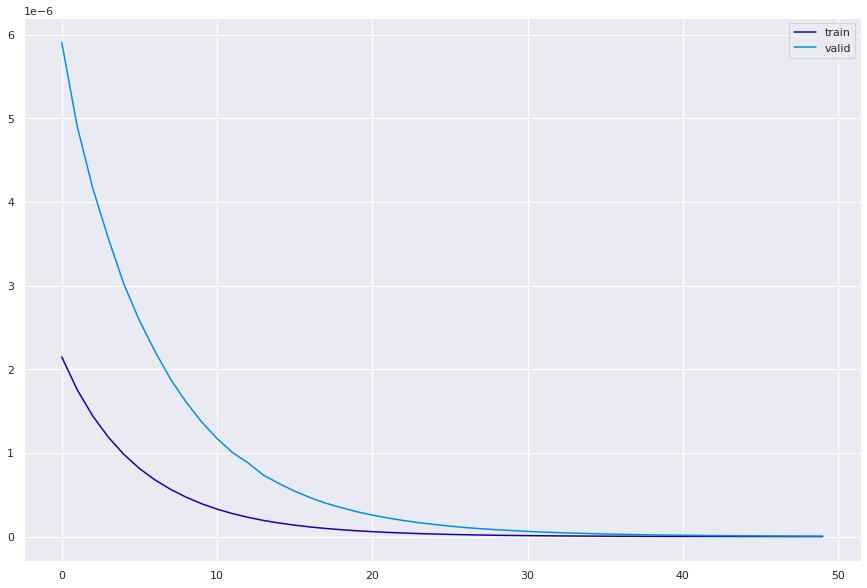

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
 
# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]
 
predictions_NN_02 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_02)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.19466666666666665


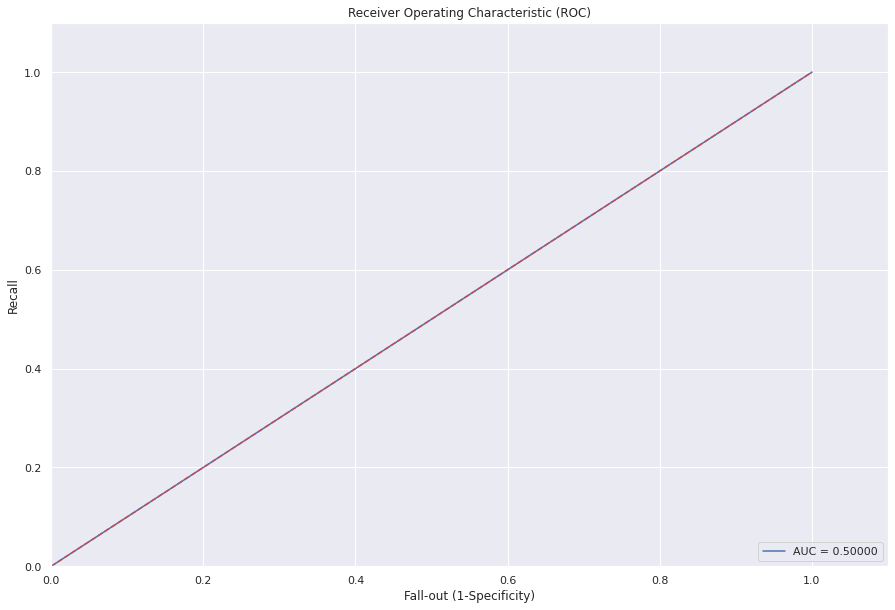

In [ ]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.5f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

* This was not really that good of a model,Overall accuracy of Neural Network model: 0.19466666666666665
* We can improve this model by first adding a dropot to pervent overfitting
* Next we can use kernel_regularizer=keras.regularizers to normalize tha samples
* Last the eazyest way to reduce overfitting is by lowering the nerueons in the hidden layers

* the AUC is at .50 which means thier is no area under the curve

Lets fix these issues by creating a new model with the changes

## Second Model

In [ ]:
   model2 = Sequential()

In [ ]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(units=4, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model2.add(Dense(units=8,activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
 
#Adding Dropout to prevent overfitting 
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (exited or not)
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 48        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 241
Trainable params: 241
Non-trainable params: 0
________________________________________________________

In [ ]:
 
#fitting the model
history=model2.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.1, shuffle= True, verbose=2)

Epoch 1/30
630/630 - 2s - loss: 0.3564 - accuracy: 0.8241 - val_loss: 0.1743 - val_accuracy: 0.9786
Epoch 2/30
630/630 - 1s - loss: 0.1514 - accuracy: 0.9844 - val_loss: 0.1141 - val_accuracy: 1.0000
Epoch 3/30
630/630 - 1s - loss: 0.1053 - accuracy: 0.9968 - val_loss: 0.0842 - val_accuracy: 1.0000
Epoch 4/30
630/630 - 1s - loss: 0.0784 - accuracy: 0.9981 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 5/30
630/630 - 1s - loss: 0.0607 - accuracy: 0.9981 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 6/30
630/630 - 1s - loss: 0.0487 - accuracy: 0.9975 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 7/30
630/630 - 1s - loss: 0.0391 - accuracy: 0.9976 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 8/30
630/630 - 1s - loss: 0.0318 - accuracy: 0.9983 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 9/30
630/630 - 1s - loss: 0.0264 - accuracy: 0.9986 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 10/30
630/630 - 1s - loss: 0.0224 - accuracy: 0.9984 - val_loss: 0.0164 - val_accuracy: 1.0000

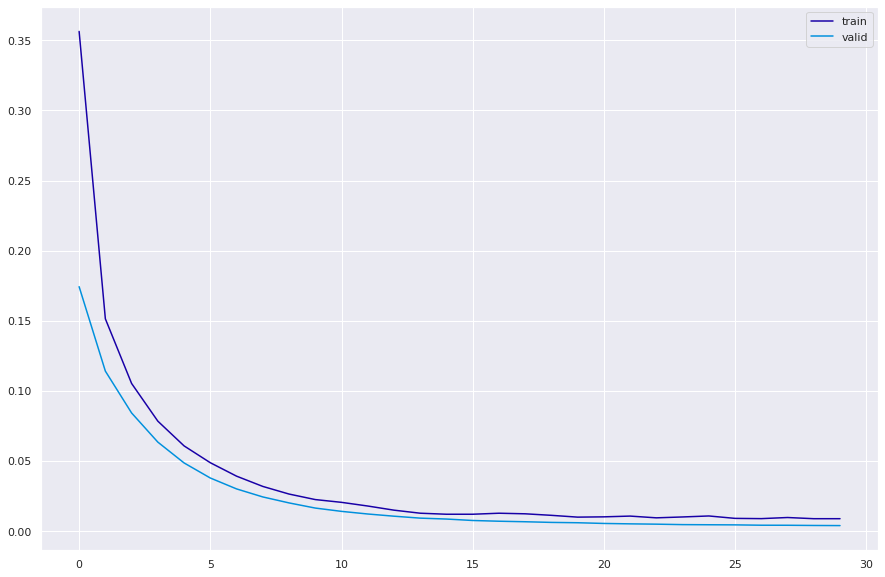

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
 
# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
#Predict on test set
predictions_NN_prob = model2.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]
 
predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 1.0


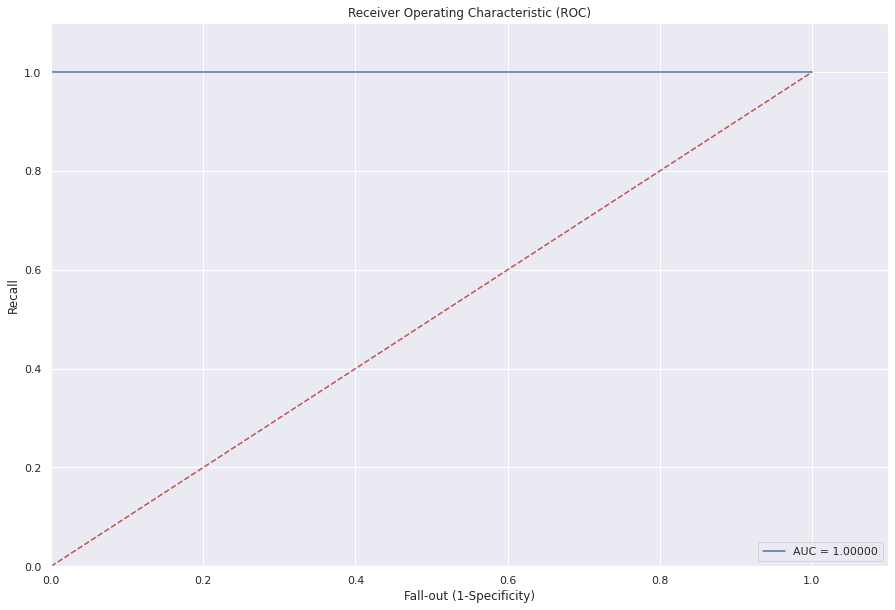

In [ ]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.5f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

* Now this a a very good model Overall accuracy of Neural Network model: 1.0
* The AUC is at 1 
* The loss was at .0038

## <a id = "link6"></a> Model Performance Evaluation

In [ ]:
score = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 7.8240e-09 - accuracy: 0.1947


In [ ]:
print(score)

[7.823953929175786e-09, 0.19466666877269745]


In [ ]:
score = model2.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000


In [ ]:
print(score)

[0.0038202113937586546, 1.0]


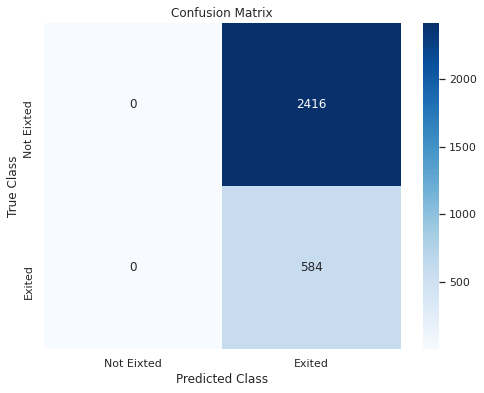

In [ ]:
 
#Print Confusion Matrix
cm = confusion_matrix(y_test, predictions_NN_02)
labels = ['Not Eixted', 'Exited']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

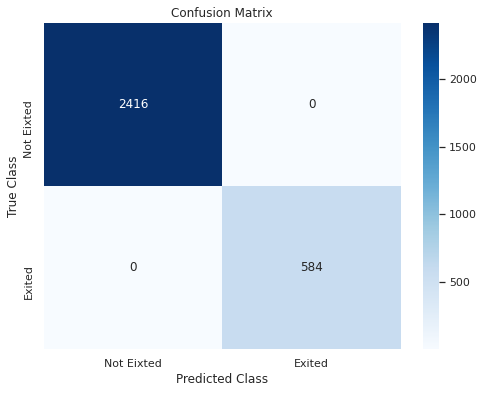

In [ ]:
 
#Print Confusion Matrix
cm = confusion_matrix(y_test, predictions_NN_01)
labels = ['Not Eixted', 'Exited']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

* The first model matrix everyone was clasified as exited and that was not the right way to go about it uses a sensitive side. The right way would have been to choose the not the sensitive or specific but a balance between both. 

* The next model you can see that we fixed that issue and our predictions for those who will not eixt didnt and those that will exit did exit with no errors. for this model we can precision or recall or both with the F1 score.

## <a id = "link7"></a> Business Recommendations/Actionable Insights

* The First issue is that we need more infomation on the exited customers
* We should also look at product 3 and 4 because alot of those customers that had either of those exited for some reason that should be looked into.
* With 2 out 4 product failing will limit the options for new and old  customers have so either we should add more products or fix the ones we already have that are failing.
